In [0]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
S = pd.read_csv('train.csv')
S.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


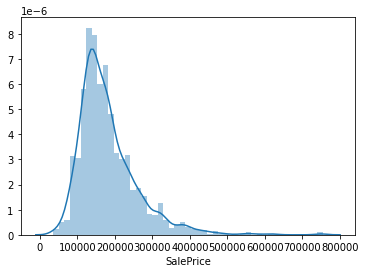

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.distplot(S['SalePrice'])


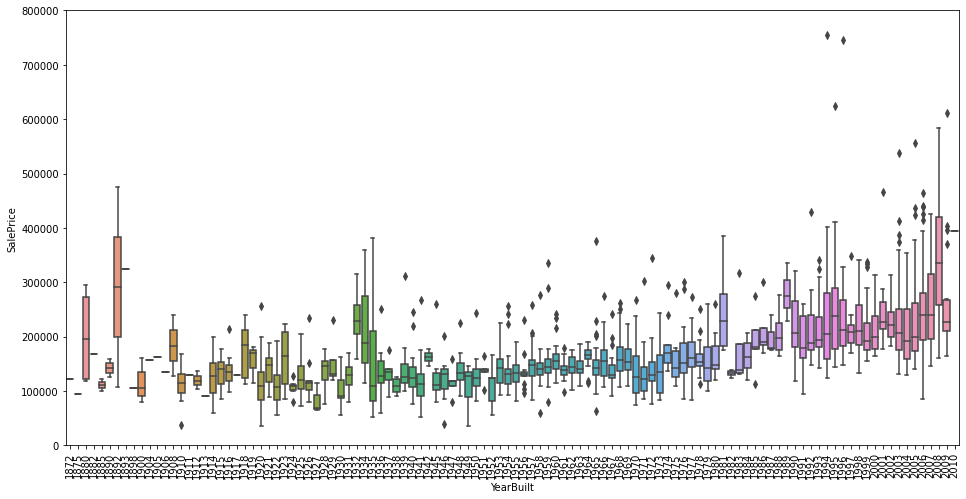

In [0]:
var = 'YearBuilt'
data = pd.concat([S['SalePrice'], S[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [0]:
print(set(S.isnull().sum()))

{0, 1, 259, 37, 38, 8, 1453, 81, 690, 1369, 1179, 1406}


In [0]:
S.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [0]:
dic_of_dic = {}
def handle_non_numerical_data(df):
    columns = df.columns.values
    global dic_of_dic 
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            dic_of_dic[column] = text_digit_vals
            df[column] = list(map(convert_to_int, df[column]))

    return df

In [0]:
S.fillna(0, inplace=True)
handle_non_numerical_data(S)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,2,3,1,4,1,5,4,3,4,7,7,5,2003,2003,3,6,10,11,2,196.0,1,1,1,4,2,2,4,706,1,0,150,856,3,...,0,1,856,854,0,1710,1,0,2,1,3,1,1,8,5,0,0,6,2003.0,2,2,548,2,2,0,0,61,0,0,0,0,0,0,0,0,2,2008,0,2,208500
1,2,20,3,80.0,9600,1,0,2,3,1,2,1,21,1,3,4,2,6,8,1976,1976,3,6,11,12,0,0.0,3,1,3,4,2,4,6,978,1,0,284,1262,3,...,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,5,1,2,6,1976.0,2,2,460,2,2,0,298,0,0,0,0,0,0,0,0,0,5,2007,0,2,181500
2,3,60,3,68.0,11250,1,0,3,3,1,4,1,5,4,3,4,7,7,5,2001,2002,3,6,10,11,2,162.0,1,1,1,4,2,3,4,486,1,0,434,920,3,...,0,1,920,866,0,1786,1,0,2,1,3,1,1,6,5,1,2,6,2001.0,2,2,608,2,2,0,0,42,0,0,0,0,0,0,0,0,9,2008,0,2,223500
3,4,70,3,60.0,9550,1,0,3,3,1,0,1,24,4,3,4,7,7,5,1915,1970,3,6,9,13,0,0.0,3,1,2,1,4,2,6,216,1,0,540,756,3,...,0,1,961,756,0,1717,1,0,1,0,3,1,1,7,5,1,5,2,1998.0,1,3,642,2,2,0,0,35,272,0,0,0,0,0,0,0,2,2006,0,3,140000
4,5,60,3,84.0,14260,1,0,3,3,1,2,1,1,4,3,4,7,8,5,2000,2000,3,6,10,11,2,350.0,1,1,1,4,2,1,4,655,1,0,490,1145,3,...,0,1,1145,1053,0,2198,1,0,2,1,4,1,1,9,5,1,2,6,2000.0,2,3,836,2,2,0,192,84,0,0,0,0,0,0,0,0,12,2008,0,2,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,2,3,1,4,1,14,4,3,4,7,6,5,1999,2000,3,6,10,11,0,0.0,3,1,1,4,2,2,1,0,1,0,953,953,3,...,0,1,953,694,0,1647,0,0,2,1,3,1,3,7,5,1,2,6,1999.0,2,2,460,2,2,0,0,40,0,0,0,0,0,0,0,0,8,2007,0,2,175000
1456,1457,20,3,85.0,13175,1,0,2,3,1,4,1,19,4,3,4,2,6,6,1978,1988,3,6,14,15,3,119.0,3,1,3,4,2,2,6,790,4,163,589,1542,3,...,0,1,2073,0,0,2073,1,0,2,0,3,1,3,7,4,2,2,6,1978.0,1,2,500,2,2,0,349,0,0,0,0,0,0,4,0,0,2,2010,0,2,210000
1457,1458,70,3,66.0,9042,1,0,2,3,1,4,1,24,4,3,4,7,7,9,1941,2006,3,6,5,8,0,0.0,2,4,5,1,4,2,4,275,1,0,877,1152,3,...,0,1,1188,1152,0,2340,0,0,2,0,4,1,1,9,5,2,5,6,1941.0,2,1,252,2,2,0,0,60,0,0,0,0,0,2,1,2500,5,2010,0,2,266500
1458,1459,20,3,68.0,9717,1,0,2,3,1,4,1,20,4,3,4,2,5,6,1950,1996,4,6,11,12,0,0.0,3,1,3,1,2,3,4,49,4,1029,0,1078,3,...,0,5,1078,0,0,1078,1,0,1,0,2,1,1,5,5,0,0,6,1950.0,1,1,240,2,2,0,366,0,112,0,0,0,0,0,0,0,4,2010,0,2,142125


In [0]:
dic_of_dic


{'Alley': {0: 0, 'Grvl': 1, 'Pave': 2},
 'BldgType': {'1Fam': 4, '2fmCon': 3, 'Duplex': 0, 'Twnhs': 1, 'TwnhsE': 2},
 'BsmtCond': {0: 0, 'Fa': 3, 'Gd': 4, 'Po': 1, 'TA': 2},
 'BsmtExposure': {0: 0, 'Av': 1, 'Gd': 4, 'Mn': 3, 'No': 2},
 'BsmtFinType1': {0: 0,
  'ALQ': 6,
  'BLQ': 5,
  'GLQ': 4,
  'LwQ': 3,
  'Rec': 2,
  'Unf': 1},
 'BsmtFinType2': {0: 0,
  'ALQ': 6,
  'BLQ': 5,
  'GLQ': 2,
  'LwQ': 3,
  'Rec': 4,
  'Unf': 1},
 'BsmtQual': {0: 0, 'Ex': 2, 'Fa': 3, 'Gd': 4, 'TA': 1},
 'CentralAir': {'N': 1, 'Y': 0},
 'Condition1': {'Artery': 8,
  'Feedr': 1,
  'Norm': 4,
  'PosA': 6,
  'PosN': 3,
  'RRAe': 5,
  'RRAn': 7,
  'RRNe': 2,
  'RRNn': 0},
 'Condition2': {'Artery': 7,
  'Feedr': 1,
  'Norm': 3,
  'PosA': 5,
  'PosN': 2,
  'RRAe': 4,
  'RRAn': 6,
  'RRNn': 0},
 'Electrical': {0: 0,
  'FuseA': 5,
  'FuseF': 2,
  'FuseP': 4,
  'Mix': 3,
  'SBrkr': 1},
 'ExterCond': {'Ex': 2, 'Fa': 3, 'Gd': 4, 'Po': 0, 'TA': 1},
 'ExterQual': {'Ex': 2, 'Fa': 0, 'Gd': 1, 'TA': 3},
 'Exterior1st': {'As

In [0]:
S.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [0]:
S = S.drop('Id',axis = 1)
y = S.SalePrice
S = S.drop('SalePrice',axis = 1)
S.head()
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(S, y, test_size = 0.25) 

In [0]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1421,120,3,53.0,4043,1,0,2,3,1,4,1,15,4,3,2,2,6,5,1977,1977,3,6,14,15,0,0.0,3,1,3,4,2,2,6,360,1,0,709,1069,3,1,0,1,1069,0,0,1069,0,0,2,0,2,1,3,4,5,1,4,6,1977.0,2,2,440,2,2,0,0,55,0,0,165,0,0,0,0,0,7,2010,0,2
125,190,1,60.0,6780,1,0,2,3,1,4,1,13,4,3,3,5,6,8,1935,1982,3,6,9,10,0,0.0,3,3,3,1,2,1,4,490,1,0,30,520,3,4,1,1,520,0,234,754,1,0,1,0,2,1,3,5,5,0,0,0,0.0,0,0,0,0,0,2,53,0,0,0,0,0,0,0,0,0,6,2006,0,2
1284,50,3,50.0,9638,1,0,2,3,1,4,1,16,1,3,4,5,6,7,1919,1990,3,6,9,13,0,0.0,3,1,1,1,2,2,1,0,1,0,804,804,3,2,0,1,1699,748,0,2447,0,0,2,0,4,1,1,10,0,1,5,2,1969.0,1,1,336,2,2,0,272,0,42,0,116,0,0,0,0,0,3,2010,0,2
1255,50,1,52.0,6240,1,0,2,3,1,4,1,17,4,3,4,5,6,6,1931,1950,3,6,9,10,0,0.0,3,1,2,1,3,2,3,425,1,0,459,884,3,1,0,5,959,408,0,1367,0,0,1,0,3,1,3,6,5,1,5,2,1978.0,1,1,560,2,2,0,0,0,0,0,120,0,0,0,0,0,11,2007,0,2
740,70,1,60.0,9600,1,1,2,3,1,4,1,6,4,3,4,7,5,7,1910,2002,3,6,9,13,0,0.0,3,4,2,3,3,2,1,0,1,0,264,264,3,2,0,1,768,664,0,1432,0,0,2,0,2,1,3,7,5,0,0,2,1910.0,1,2,360,2,1,0,270,0,112,0,0,0,0,2,0,0,5,2007,0,3


In [0]:
alpha = np.mean(X_train,axis = 0)
beta = np.std(X_train,axis = 0)

In [0]:
X_train = (X_train+alpha)/beta
X_test = (X_test+alpha)/beta

In [0]:
X_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [0]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.6235646484296015


In [0]:
from sklearn.svm import SVR
clf = SVR(C=100, epsilon=0.2,kernel = 'linear')
clf.fit(X_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
clf.score(X_test,y_test)

0.6913453963110051

In [0]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
regr.score(X_test,y_test)


0.8574168581949762

In [0]:
from sklearn import ensemble
original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}
params = dict(original_params)
clg = ensemble.GradientBoostingRegressor(**params)
clg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls',
                          max_depth=None, max_features=None, max_leaf_nodes=4,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
clg.score(X_test,y_test)

0.8953911434964998

In [0]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
R = pd.read_csv('test.csv')
R.head()
R = R.drop('Id',axis =1 )


In [0]:
R.fillna(0,inplace=True)
R.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [0]:

for i in list(dic_of_dic.keys()):
  R[i] = R[i].map(dic_of_dic[i])
R.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,4.0,80.0,11622,1,0,2,3,1.0,4,1,20,1,3,4,2,5,6,1961,1961,3,6,10.0,11.0,0,0.0,3,1,3,1,2,2,2,468.0,3,144.0,270.0,882.0,3,1,0,1,896,0,0,896,0.0,0.0,1,0,2,1,3.0,5,5.0,0,0,6,1961.0,1,1.0,730.0,2,2,0,140,0,0,0,120,0,0,4,0,0,6,2010,0.0,2
1,20,3.0,81.0,14267,1,0,3,3,1.0,0,1,20,4,3,4,2,6,6,1958,1958,4,6,9.0,10.0,2,108.0,3,1,3,1,2,2,6,923.0,1,0.0,406.0,1329.0,3,1,0,1,1329,0,0,1329,0.0,0.0,1,1,3,1,1.0,6,5.0,0,0,6,1958.0,1,1.0,312.0,2,2,0,393,36,0,0,0,0,0,0,4,12500,6,2010,0.0,2
2,60,3.0,74.0,13830,1,0,3,3,1.0,4,1,14,4,3,4,7,5,5,1997,1998,3,6,10.0,11.0,0,0.0,3,1,1,4,2,2,4,791.0,1,0.0,137.0,928.0,3,4,0,1,928,701,0,1629,0.0,0.0,2,1,3,1,3.0,6,5.0,1,2,6,1997.0,3,2.0,482.0,2,2,0,212,34,0,0,0,0,0,4,0,0,3,2010,0.0,2
3,60,3.0,78.0,9978,1,0,3,3,1.0,4,1,14,4,3,4,7,6,6,1998,1998,3,6,10.0,11.0,2,20.0,3,1,1,1,2,2,4,602.0,1,0.0,324.0,926.0,3,2,0,1,926,678,0,1604,0.0,0.0,2,1,3,1,1.0,7,5.0,1,5,6,1998.0,3,2.0,470.0,2,2,0,360,36,0,0,0,0,0,0,0,0,6,2010,0.0,2
4,120,3.0,43.0,5005,1,0,3,1,1.0,4,1,2,4,3,2,2,8,5,1992,1992,3,6,0.0,0.0,0,0.0,1,1,1,4,2,2,6,263.0,1,0.0,1017.0,1280.0,3,2,0,1,1280,0,0,1280,0.0,0.0,2,0,2,1,1.0,5,5.0,0,0,6,1992.0,2,2.0,506.0,2,2,0,0,82,0,0,144,0,0,0,0,0,1,2010,0.0,2


In [0]:
R.isnull().sum()

MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 79, dtype: int64

In [0]:
R = (R+alpha)/beta

In [0]:
R.fillna(0,inplace=True)

In [0]:
R.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [0]:
ans = clg.predict(R)

In [0]:
df1 = pd.read_csv('test.csv')
df1.shape

(1459, 80)

In [0]:
df1['SalePrice'] = ans


In [0]:
myans = df1[["Id","SalePrice"]]

In [0]:
myans.to_csv('myans1.csv', index = False)